# Условия

2 лаба: 
Аристова, Завьялова, Лобанов, II.10.6 , выбрать вариант самостоятельно. 
Решить СЛАУ .
##### Прямыми методами:
- [x] Методом Гаусса с выбором главного элемента
- [x] LU-разложением (если возможно) 

##### Итерационными методами: 
- [x] Метод Зейделя 
- [x] Метод Якоби
- [x] Метод верхней релаксации 

Чтобы показать, что найденное решение true 
- [x] для прямых методов: подставить решение в исходную систему и получить невязку ~ 0. 
- [x] для итерационных методов: показать убывание невязки (график изменения невязки от числа итераций) . 

Дедлайн к 11 октября.

In [15]:
import numpy as np
import matplotlib.pyplot as plt 

### Матрица СЛАУ (вариант "г")

In [16]:
original_matrix = np.array([[0.0] * 101] * 100)
print("Shapre of matrix =", np.shape(original_matrix))

for i in range(100):
    original_matrix[0][i] = 1

for i in range(100):
    original_matrix[i][100] = 100-i

for i in range(1, 99):
    original_matrix[i][i-1] = 1
    original_matrix[i][i] = 10
    original_matrix[i][i+1] = 1

original_matrix[99][98] = 1
original_matrix[99][99] = 1

original_matrix

Shapre of matrix = (100, 101)


array([[  1.,   1.,   1., ...,   1.,   1., 100.],
       [  1.,  10.,   1., ...,   0.,   0.,  99.],
       [  0.,   1.,  10., ...,   0.,   0.,  98.],
       ...,
       [  0.,   0.,   0., ...,   1.,   0.,   3.],
       [  0.,   0.,   0., ...,  10.,   1.,   2.],
       [  0.,   0.,   0., ...,   1.,   1.,   1.]])

### Метод Гаусса с выбором главного элемента

In [17]:
def FindLineWithMaxElemBelowCurrentLine(matrix, line):
    max_elem = 0
    max_line = 0
    for i in range(line, len(matrix)):
        for j in range(matrix[i]):
            if abs(matrix[i][j]) > max_elem:
                max_elem = abs(matrix[i][j])
                max_line = i
    return max_line

def ZeroingLinesBelowCurrentLine(matrix, line):
    if matrix[line][line] == 0:
        return
    for line_below in range(line + 1, len(matrix)):
        k = matrix[line_below][line] / matrix[line][line]
        matrix[line_below] -= k * matrix[line]

def ZeroingLinesAboveCurrentLine(matrix, line):
    if matrix[line][line] == 0:
        return
    for line_above in range(line - 1, -1, -1):
        k = matrix[line_above][line] / matrix[line][line]
        matrix[line_above] -= k * matrix[line]

def ExtractSolutionFromNormalizedMatrix(matrix):
    x = np.array([0.0] * (len(matrix[0]) - 1))
    for line in range(len(matrix)):
        if matrix[line][line] == 0:
            if matrix[line][-1] != 0:
                print("Нет решений")
                return []
            x[line] = np.nan
        else:
            x[line] = matrix[line][-1] / matrix[line][line]
    return x

def GaussMethodWithMaxElement(matrix):
    for line in range(len(matrix)):
        ZeroingLinesBelowCurrentLine(matrix, line)
    for line in range(len(matrix) - 1, -1, -1):
        ZeroingLinesAboveCurrentLine(matrix, line)
    return ExtractSolutionFromNormalizedMatrix(matrix)

### Тестирование метода

In [18]:
test_matrix = np.array([[1.0, 2.0, 3.0, 7.0], [2.0, 1.0, 3.0, 8.0], [1, 1, 1, 4]])

print(test_matrix)
GaussMethodWithMaxElement(test_matrix)
print(GaussMethodWithMaxElement(test_matrix))

[[1. 2. 3. 7.]
 [2. 1. 3. 8.]
 [1. 1. 1. 4.]]
[2. 1. 1.]


### Решение задачи

In [19]:
print("Решение: ", GaussMethodWithMaxElement(original_matrix.copy()))

Решение:  [-3.45745028e+02  4.40191782e+01  4.55324589e+00  8.44836296e+00
  7.96312452e+00  7.92039185e+00  7.83295701e+00  7.75003802e+00
  7.66666283e+00  7.58333372e+00  7.49999996e+00  7.41666667e+00
  7.33333333e+00  7.25000000e+00  7.16666667e+00  7.08333333e+00
  7.00000000e+00  6.91666667e+00  6.83333333e+00  6.75000000e+00
  6.66666667e+00  6.58333333e+00  6.50000000e+00  6.41666667e+00
  6.33333333e+00  6.25000000e+00  6.16666667e+00  6.08333333e+00
  6.00000000e+00  5.91666667e+00  5.83333333e+00  5.75000000e+00
  5.66666667e+00  5.58333333e+00  5.50000000e+00  5.41666667e+00
  5.33333333e+00  5.25000000e+00  5.16666667e+00  5.08333333e+00
  5.00000000e+00  4.91666667e+00  4.83333333e+00  4.75000000e+00
  4.66666667e+00  4.58333333e+00  4.50000000e+00  4.41666667e+00
  4.33333333e+00  4.25000000e+00  4.16666667e+00  4.08333333e+00
  4.00000000e+00  3.91666667e+00  3.83333333e+00  3.75000000e+00
  3.66666667e+00  3.58333333e+00  3.50000000e+00  3.41666667e+00
  3.33333333e+0

### Метод LU-разложения

In [20]:
def LUDecomposition(matrix):
    L = np.array([[0.0] * len(matrix)] * len(matrix))
    U = L.copy()

    for i in range(len(matrix)):
        L[i][i] = 1

    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if i <= j:
                sum = 0.0
                for k in range(i):
                    sum += L[i][k] * U[k][j]
                U[i][j] = matrix[i][j] - sum
            if i > j:
                sum = 0.0
                for k in range(j):
                    sum += L[i][k] * U[k][j]
                if U[j][j] == 0:
                    L[i][j] = np.nan
                    print("Error! Can't do LU-decomposition")
                    return
                L[i][j] = (matrix[i][j] - sum) / U[j][j]

    y = np.array([0.0] * len(matrix))
    for i in range(len(matrix)):
        y[i] = (matrix[i][-1] - np.sum(L[i] * y)) / L[i][i]

    x = np.array([0.0] * len(matrix))
    for i in range(len(matrix) - 1, -1, -1):
        x[i] = (y[i] - np.sum(U[i] * x)) / U[i][i]
    return x

### Тестирование метода

In [21]:
test_matrix = np.array([[1.0, 2.0, 3.0, 7.0], [2.0, 1.0, 3.0, 8.0], [1, 1, 1, 4]])
print(LUDecomposition(test_matrix))

[2. 1. 1.]


### Решение задачи

In [22]:
print(LUDecomposition(original_matrix.copy()))

[-3.45745028e+02  4.40191782e+01  4.55324589e+00  8.44836296e+00
  7.96312452e+00  7.92039185e+00  7.83295701e+00  7.75003802e+00
  7.66666283e+00  7.58333372e+00  7.49999996e+00  7.41666667e+00
  7.33333333e+00  7.25000000e+00  7.16666667e+00  7.08333333e+00
  7.00000000e+00  6.91666667e+00  6.83333333e+00  6.75000000e+00
  6.66666667e+00  6.58333333e+00  6.50000000e+00  6.41666667e+00
  6.33333333e+00  6.25000000e+00  6.16666667e+00  6.08333333e+00
  6.00000000e+00  5.91666667e+00  5.83333333e+00  5.75000000e+00
  5.66666667e+00  5.58333333e+00  5.50000000e+00  5.41666667e+00
  5.33333333e+00  5.25000000e+00  5.16666667e+00  5.08333333e+00
  5.00000000e+00  4.91666667e+00  4.83333333e+00  4.75000000e+00
  4.66666667e+00  4.58333333e+00  4.50000000e+00  4.41666667e+00
  4.33333333e+00  4.25000000e+00  4.16666667e+00  4.08333333e+00
  4.00000000e+00  3.91666667e+00  3.83333333e+00  3.75000000e+00
  3.66666667e+00  3.58333333e+00  3.50000000e+00  3.41666667e+00
  3.33333333e+00  3.25000

### Невязка

In [23]:
def Discrepancy(matrix, x):   # Невязка
    y = np.array([0.0] * len(matrix))
    for i in range(len(matrix)):
        y[i] = np.matmul(matrix[i][:-1], x) - matrix[i][-1]
    return y

### Рассчет невязки

In [24]:
print("Test:")
print(Discrepancy(test_matrix, LUDecomposition(test_matrix)))

matrix = original_matrix.copy()
print("Невязка в задаче методом Гаусса:")
print(Discrepancy(matrix, LUDecomposition(matrix)))

print("Невязка в задаче методом LU-разложения:")
print(Discrepancy(matrix, GaussMethodWithMaxElement(matrix)))

Test:
[0. 0. 0.]
Невязка в задаче методом Гаусса:
[ 5.68434189e-14  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.42108547e-14  0.00000000e+00 -1.42108547e-14  0.00000000e+00
 -1.42108547e-14  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.42108547e-14  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.42108547e-14  0.00000000e+00 -1.42108547e-14
  0.00000000e+00  1.42108547e-14  1.42108547e-14  0.00000000e+00
  1.42108547e-14  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.42108547e-14  0.00000000e+00  0.00000000e+00
  0.00000000e+00  7.10542736e-15 -7.10542736e-15  7.10542736e-15
  0.00000000e+00  0.00000000e+00  0.00000000e+00  7.10542736e-15
 -7.10542736e-15  1.42108547e-14  7.10542736e-15  7.10542736e-15
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  7.10542736e-15  7.10542736e-15
  7.10542736e-15  0.00000000e+00  7.1054

# Итерационные методы

In [25]:
max_iterations = 1000000
eps = 0.000000000000001 # max error

### Полезные операции с матрицами

In [26]:
def LMatrix(matrix):
    L = np.array([[0.0] * len(matrix)] * len(matrix))
    for i in range(len(matrix)):
        for j in range(i):
            L[i][j] = matrix[i][j]
    return L

def DMatrix(matrix):
    D = np.array([[0.0] * len(matrix)] * len(matrix))
    for i in range(len(matrix)):
        D[i][i] = matrix[i][i]
    return D

def UMatrix(matrix):
    U = np.array([[0.0] * len(matrix)] * len(matrix))
    for i in range(len(matrix)):
        for j in range(i + 1, len(matrix)):
            U[i][j] = matrix[i][j]
    return U

def InvMatrix(matrix):
    if np.linalg.det(matrix) == 0:
        print("Error! Inv matrix does not exist!")
        print(matrix)
        return matrix * 0
    return np.linalg.inv(matrix)

### Метод Зейделя

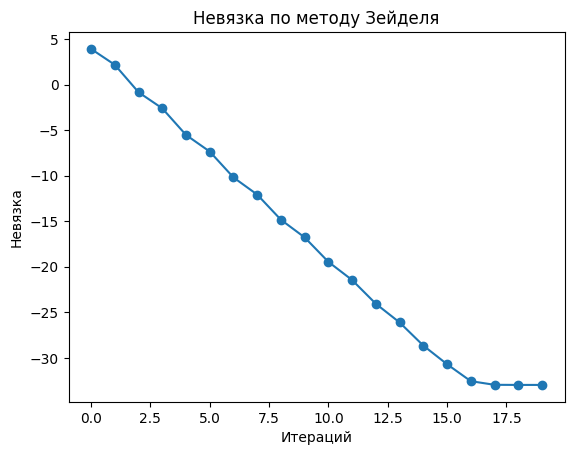

In [27]:
def SeidelMethod(matrix, iterations):
    x = np.array([0.0] * len(matrix))
    minus_U = - UMatrix(matrix)
    inv_L_D = InvMatrix(LMatrix(matrix) + DMatrix(matrix))
    b = [matrix[i][-1] for i in range(len(matrix))]

    if inv_L_D.any() == 0:
        print("Error! inv_L_D does not exist")
        return
    
    for i in range(iterations):
        x = np.matmul(inv_L_D, np.matmul(minus_U, x) + b)
    return x

# matrix = test_matrix
iterations_number = 20
matrix = original_matrix.copy()
plt.plot(range(iterations_number), np.log(np.array([np.average(np.abs(Discrepancy(matrix, SeidelMethod(matrix, i))))
                                        for i in range(iterations_number)])), marker = 'o')
plt.xlabel('Итераций')
plt.ylabel('Невязка')
plt.title('Невязка по методу Зейделя')
plt.show()


### Метод Якоби

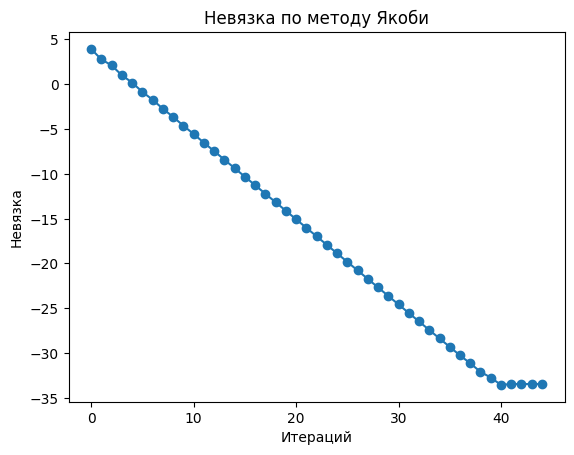

In [28]:
def JakobiMethod(matrix, iterations):
    L = LMatrix(matrix)
    U = UMatrix(matrix)
    x = np.array([0.0] * len(matrix))
    b = [matrix[i][-1] for i in range(len(matrix))]
    D_inv = InvMatrix(DMatrix(matrix))

    for i in range(iterations):
        x = np.matmul(D_inv, b - np.matmul(L + U, x))
    
    return x


# matrix = test_matrix
iterations_number = 45
matrix = original_matrix.copy()
plt.plot(range(iterations_number), np.log(np.array([np.average(np.abs(Discrepancy(matrix, JakobiMethod(matrix, i))))
                                        for i in range(iterations_number)])), marker = 'o')
plt.xlabel('Итераций')
plt.ylabel('Невязка')
plt.title('Невязка по методу Якоби')
plt.show()

### Метод верхней релаксации

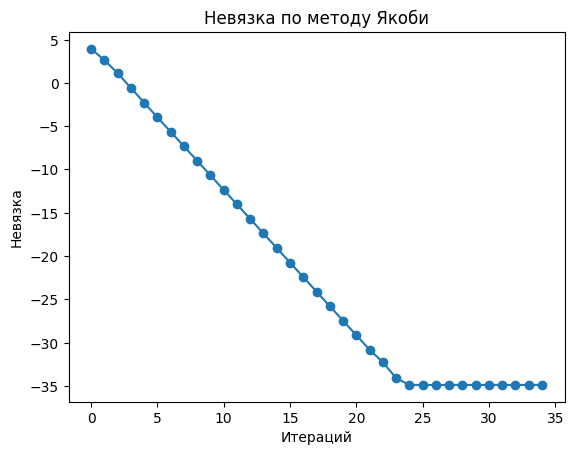

In [29]:
def RelaxationMethod(matrix, iterations, w):
    x = np.array([0.0] * len(matrix))
    flag = False
    for k in range(iterations):
        x_old = x.copy()
        for i in range(len(matrix)):
            row_sum = np.matmul(matrix[i][:-1], x) - matrix[i][i] * x[i]
            x[i] = (matrix[i][len(matrix)] - row_sum) / matrix[i][i]
            x[i] = x[i] + (w - 1) * (x[i] - x_old[i])
    return x


# matrix = test_matrix
w = 1.1 # параметр релаксации
iterations_number = 35
matrix = original_matrix.copy()
plt.plot(range(iterations_number), np.log(np.array([np.average(np.abs(Discrepancy(matrix, RelaxationMethod(matrix, i, w))))
                                        for i in range(iterations_number)])), marker = 'o')
plt.xlabel('Итераций')
plt.ylabel('Невязка')
plt.title('Невязка по методу Якоби')
plt.show()